In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import random
import statistics
from math import pi
from matplotlib.gridspec import GridSpec
from dateutil.relativedelta import *
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import scipy.stats

In [4]:
!python3 '/Users/leosilva/development/thesis/workspacePyCharm/TwitterDataMining/main_generate_json_files.py'

Starting script...
Removing existing file...
Ending script...


In [75]:
data = pd.read_json(r'/Users/leosilva/development/thesis/workspacePyCharm/TwitterDataMining/alldata.json')
print(not data[26]['bigfive'])
print(data[32]['bigfive'])

False
[]


In [8]:
def create_tweets_pd(data, id_user):

    tweets_pd = pd.DataFrame(data[id_user]['tweets'])
    tweets_pd.columns = ['id', 'id_str_twitter', "text", "created_at", 'favorite_count', 'retweet_count', 'lang',
                         "id_user", "vader_sentiment_analysis_score", "vader_sentiment_analysis_polarity",
                         "oplexicon_sentiment_analysis_score", "oplexicon_sentiment_analysis_polarity",
                         "sentistrength_sentiment_analysis_score", "sentistrength_sentiment_analysis_polarity",
                         "sentilexpt_sentiment_analysis_score", "sentilexpt_sentiment_analysis_polarity",
                         "final_score", "final_polarity", 'text_updated', 'is_retweet', 'retweet_updated']
 
    return tweets_pd

In [76]:
def create_line_plot(tweets, id_user, count):
    fig, ax = plt.subplots(figsize=(30, 12))

    tweets["created_at"] = pd.to_datetime(tweets["created_at"])
    tweets['date_minus_time'] = tweets["created_at"].apply(lambda tweets : datetime.datetime(year=tweets.year, month=tweets.month, day=tweets.day))
    tweets.set_index(tweets["date_minus_time"],inplace=True)

    new_df = pd.DataFrame(tweets['final_score'].resample('D').mean())
    new_df = new_df.fillna(0)

    x = new_df.index
    y = new_df['final_score']

    ran = range(0, len(x), 15)

    x_ticks = new_df.index[ran]

    plt.yticks(np.arange(-1.0, 1.1, 0.1), fontsize=16)
    plt.xticks(x_ticks, rotation='vertical', fontsize=16)

    date_form = DateFormatter("%Y-%m-%d")
    ax.xaxis.set_major_formatter(date_form)
    plt.xlabel('Day', fontsize=16)
    plt.ylabel('Polarity Score', fontsize=16)

    plt.title("Tweets polarity per day - Participant {} - User {}".format(count, id_user), fontsize=30, pad = 20)
    plt.ylabel("Polarity", fontsize=26, labelpad = 10)
    plt.xlabel("Days", fontsize=26, labelpad = 10)

    # plt.axhline(y.mean(), color='k', linestyle='dashed', linewidth=1)
    # min_ylim, max_ylim = plt.ylim()
    # plt.text(y.mean()*0.05, max_ylim*0.12, 'Mean: {:.2f}'.format(y.mean()))

    plt.margins(x=0.02)
    plt.tight_layout()
    plt.plot(x,y)

26
27
28
30
31
34
35
37
38
39
40
41


DataError: No numeric types to aggregate

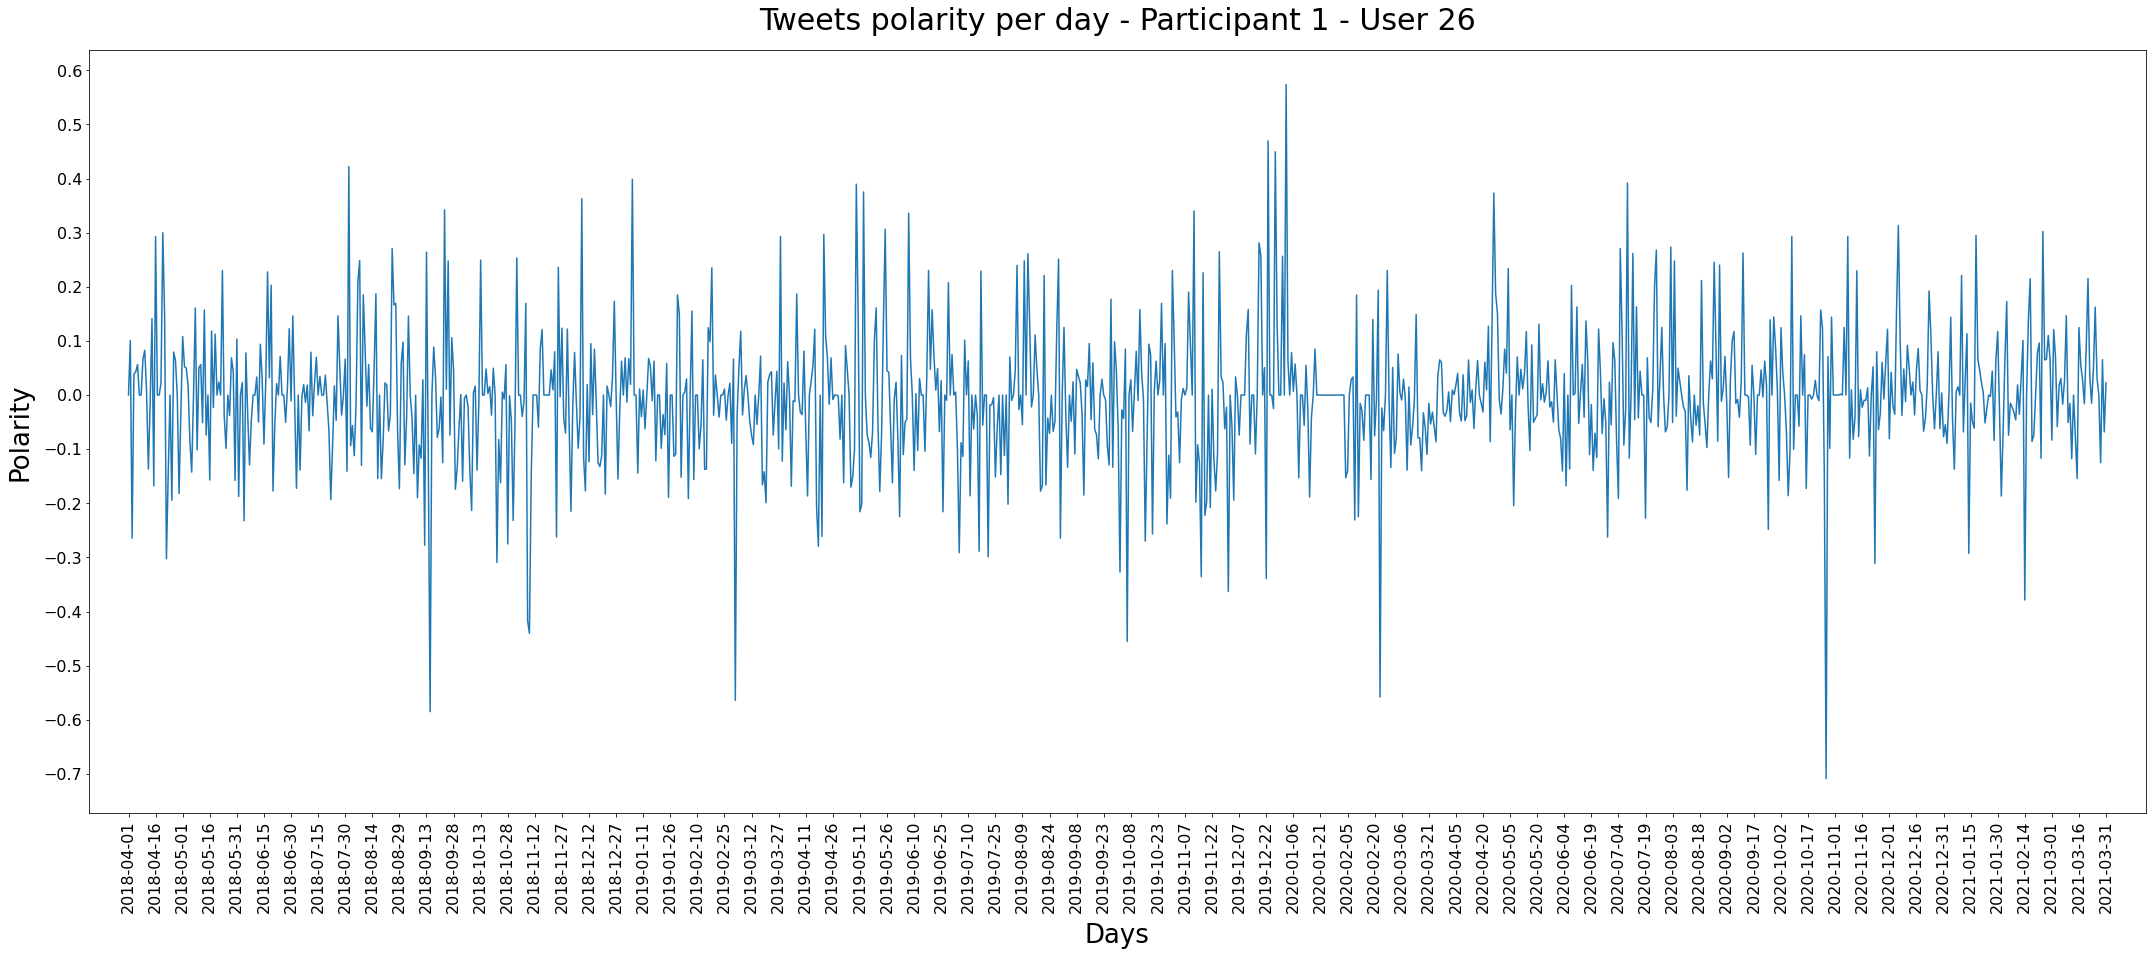

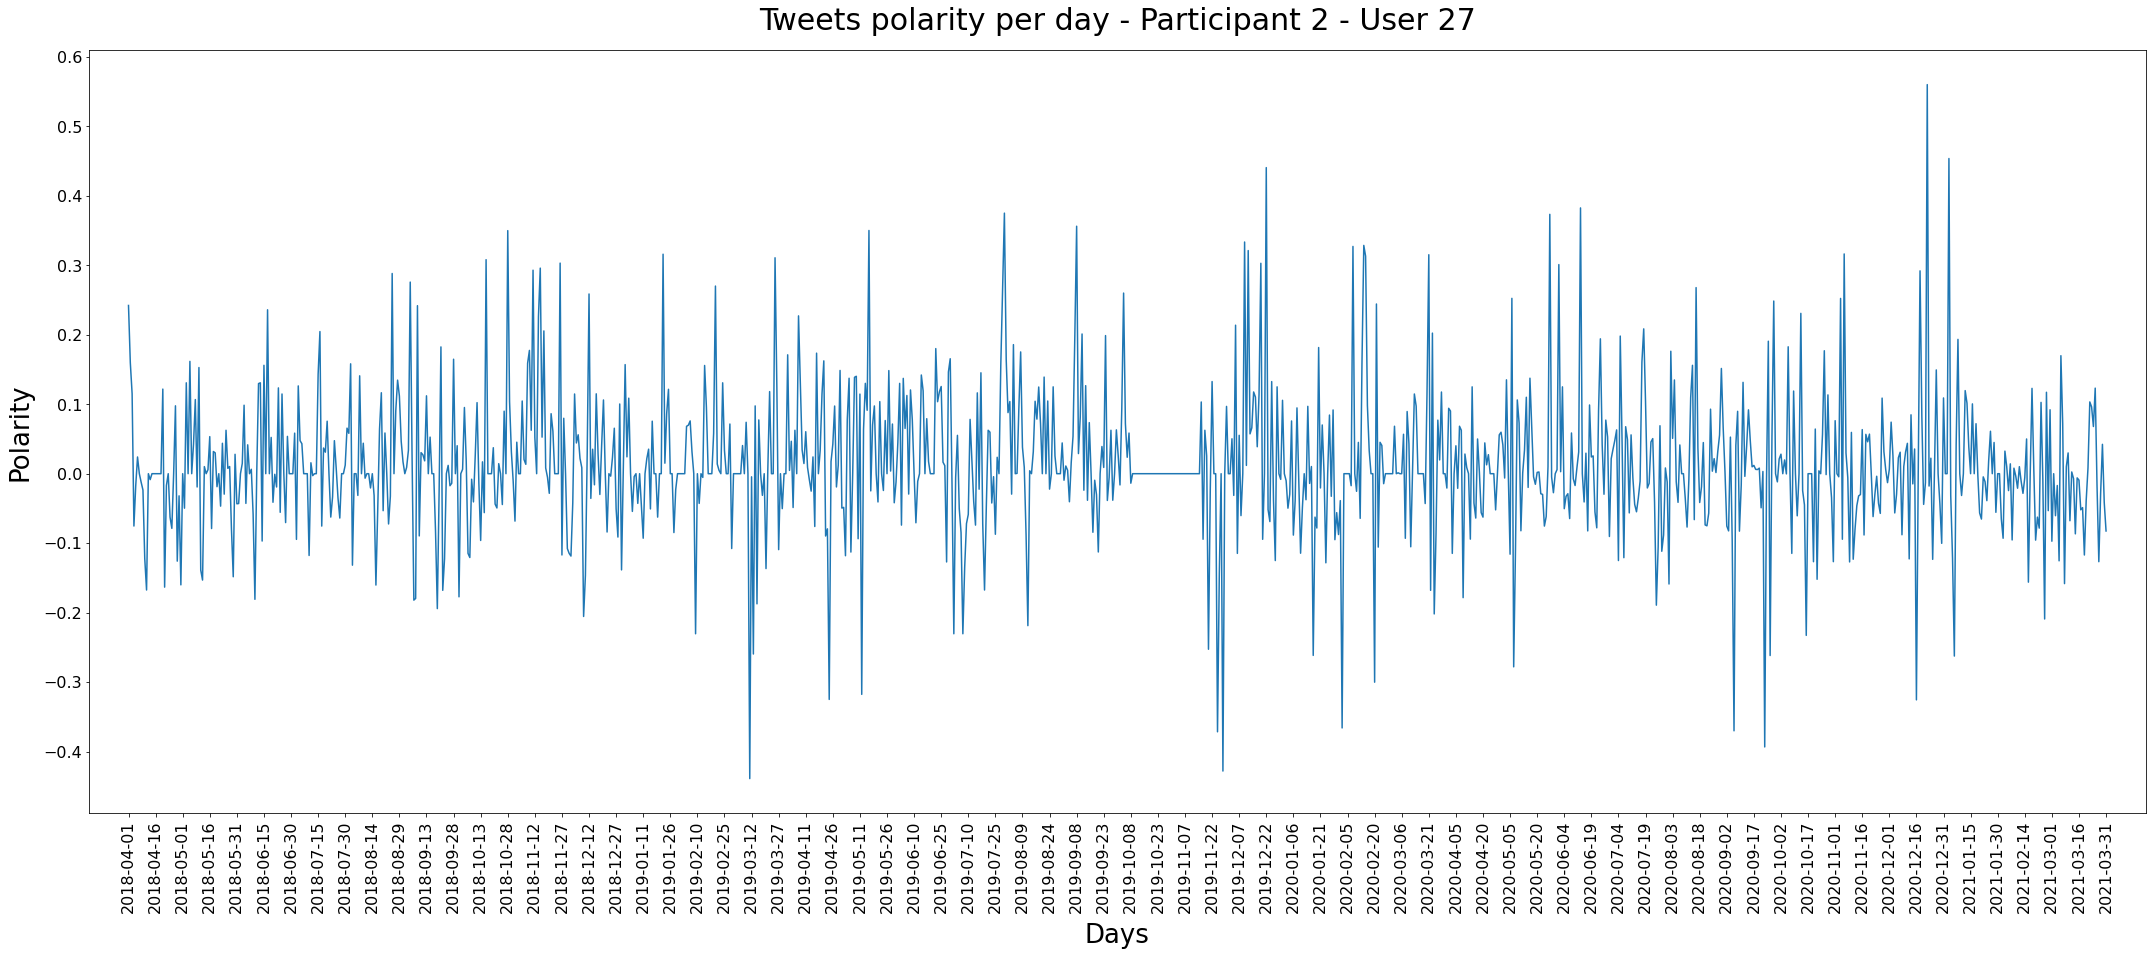

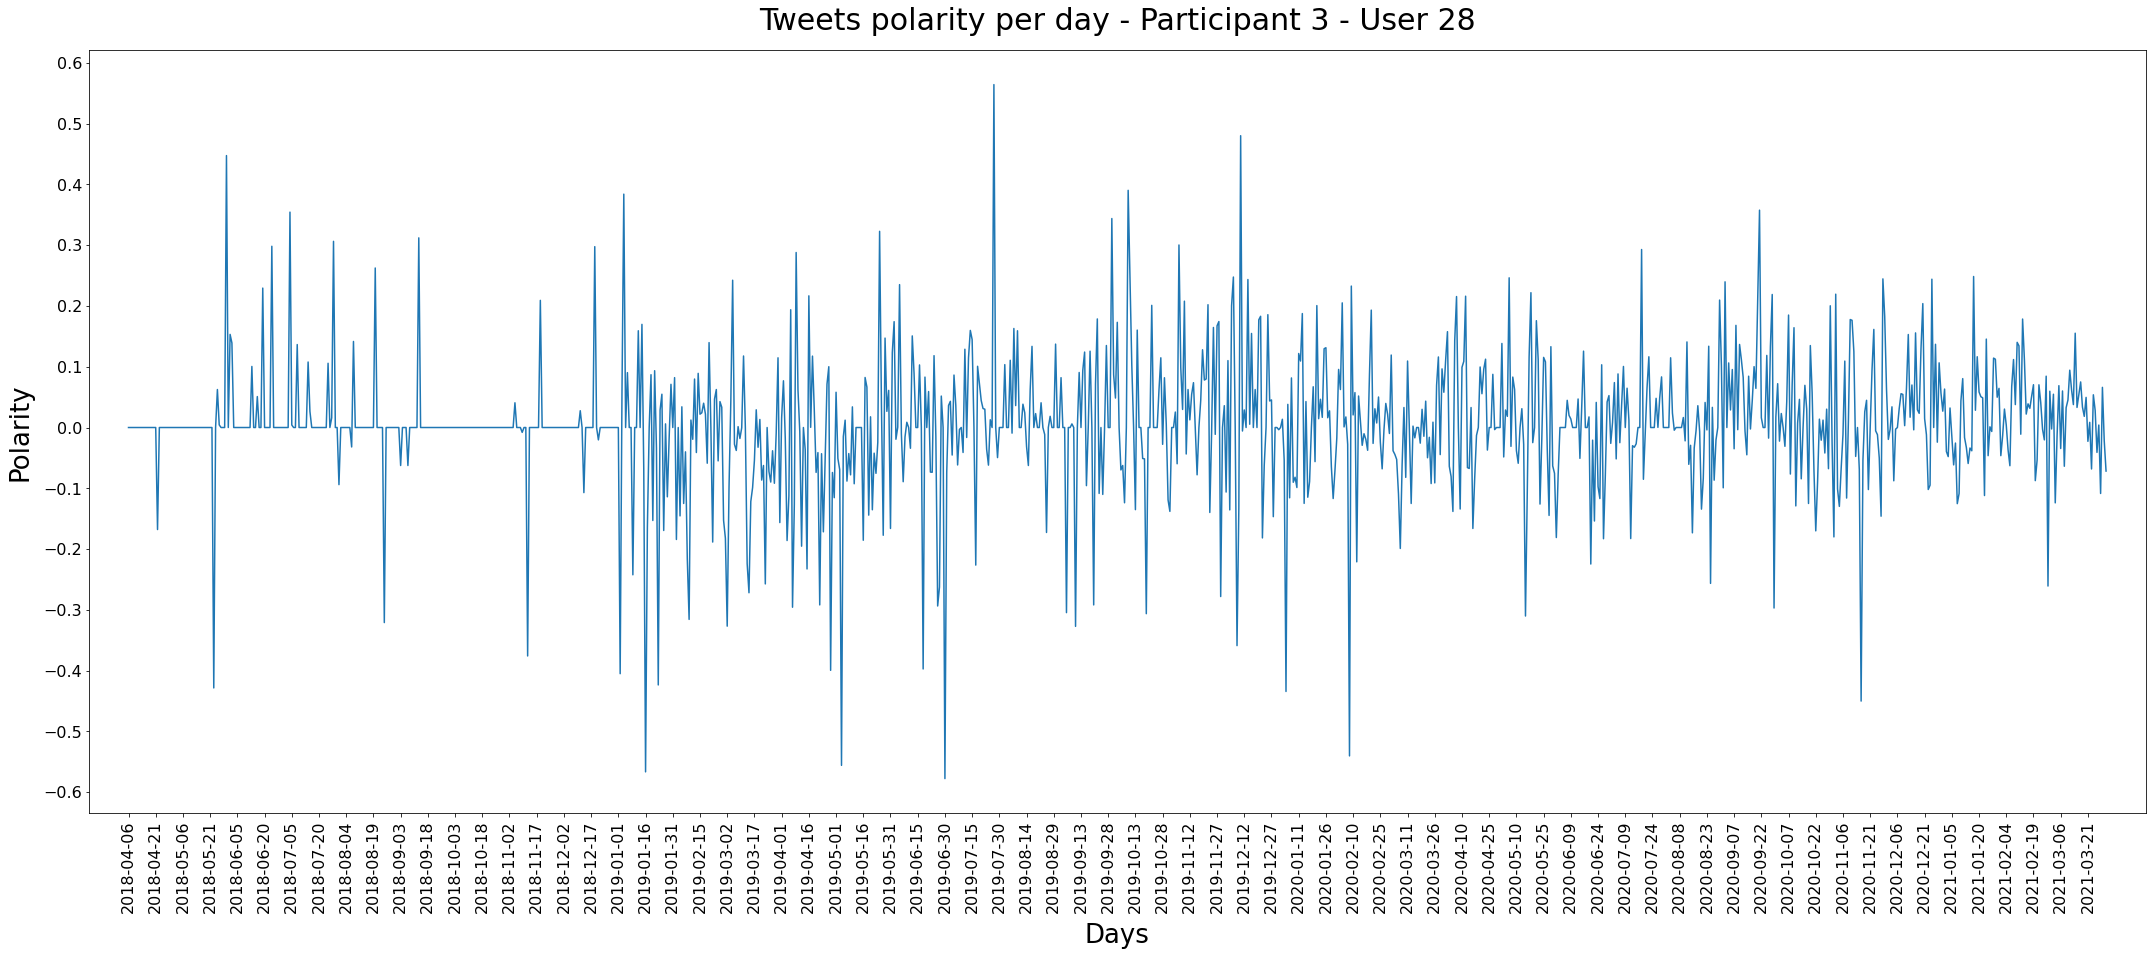

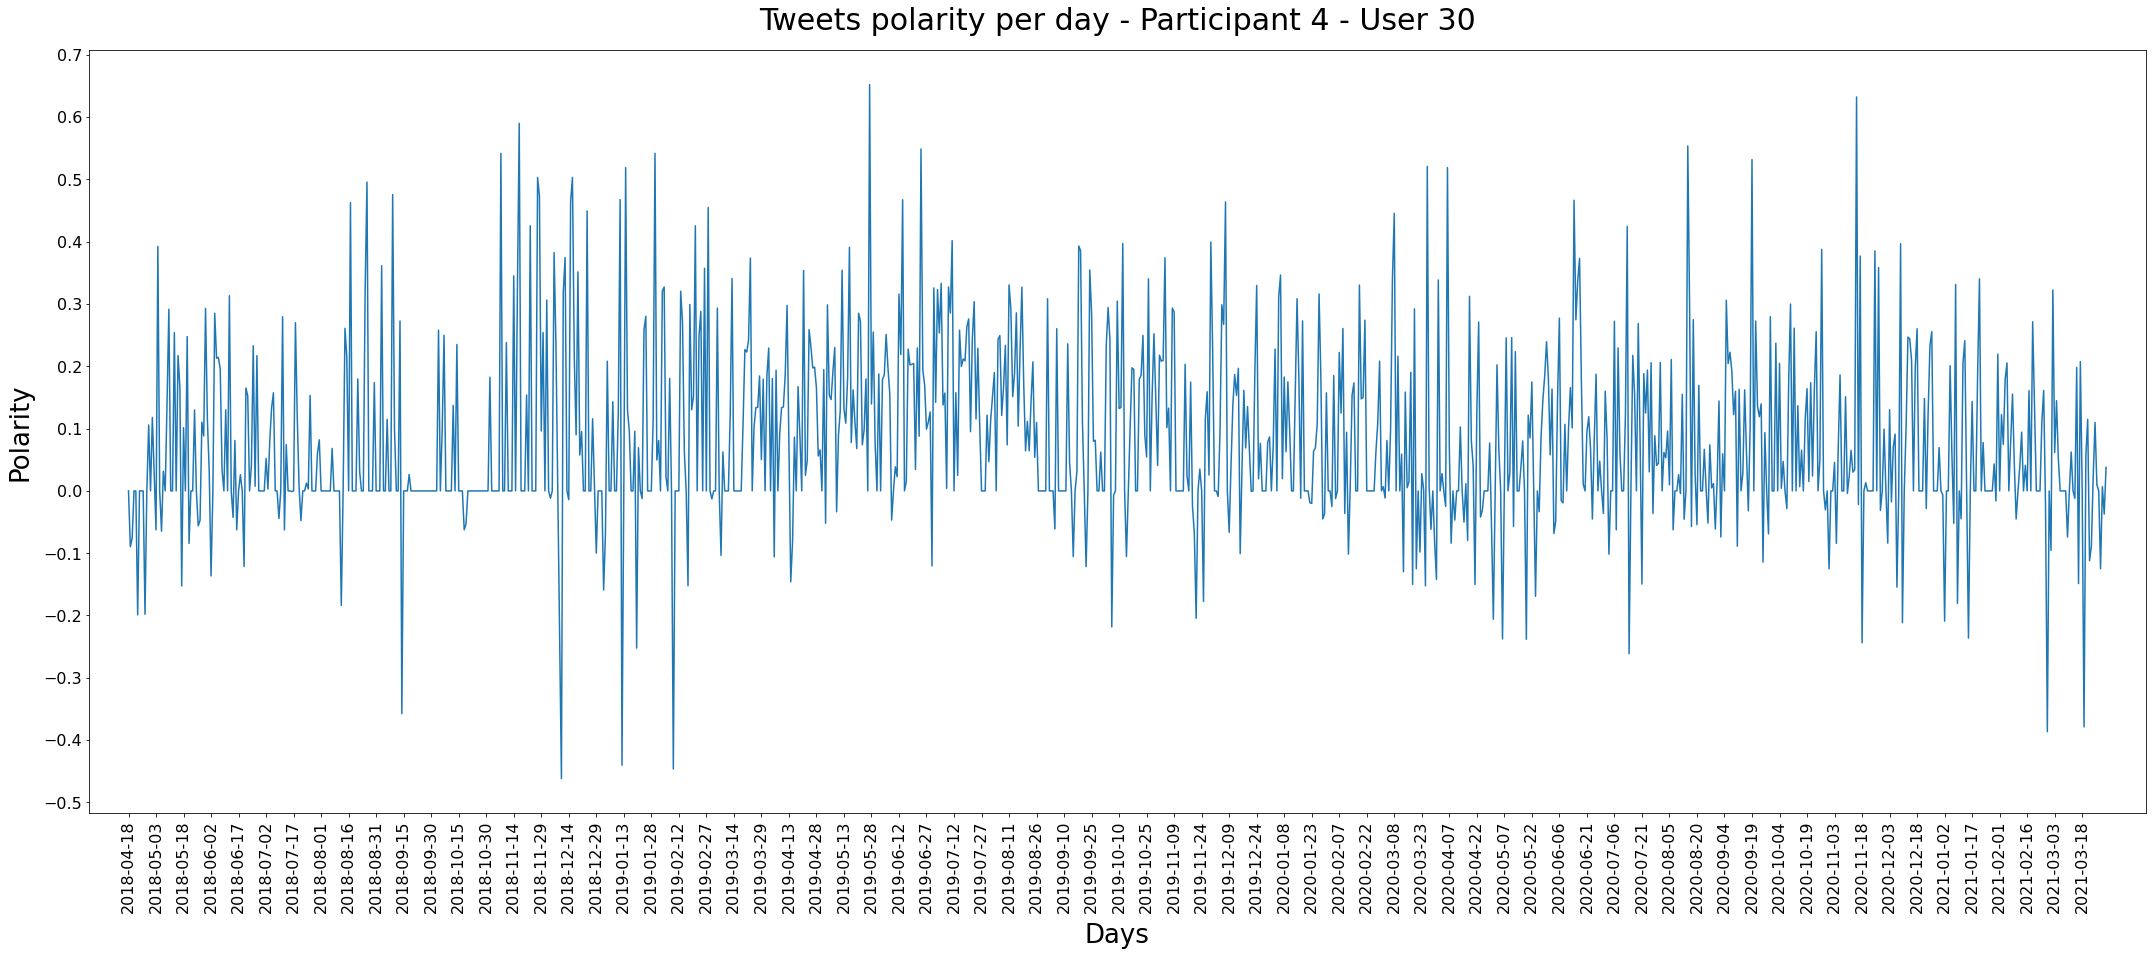

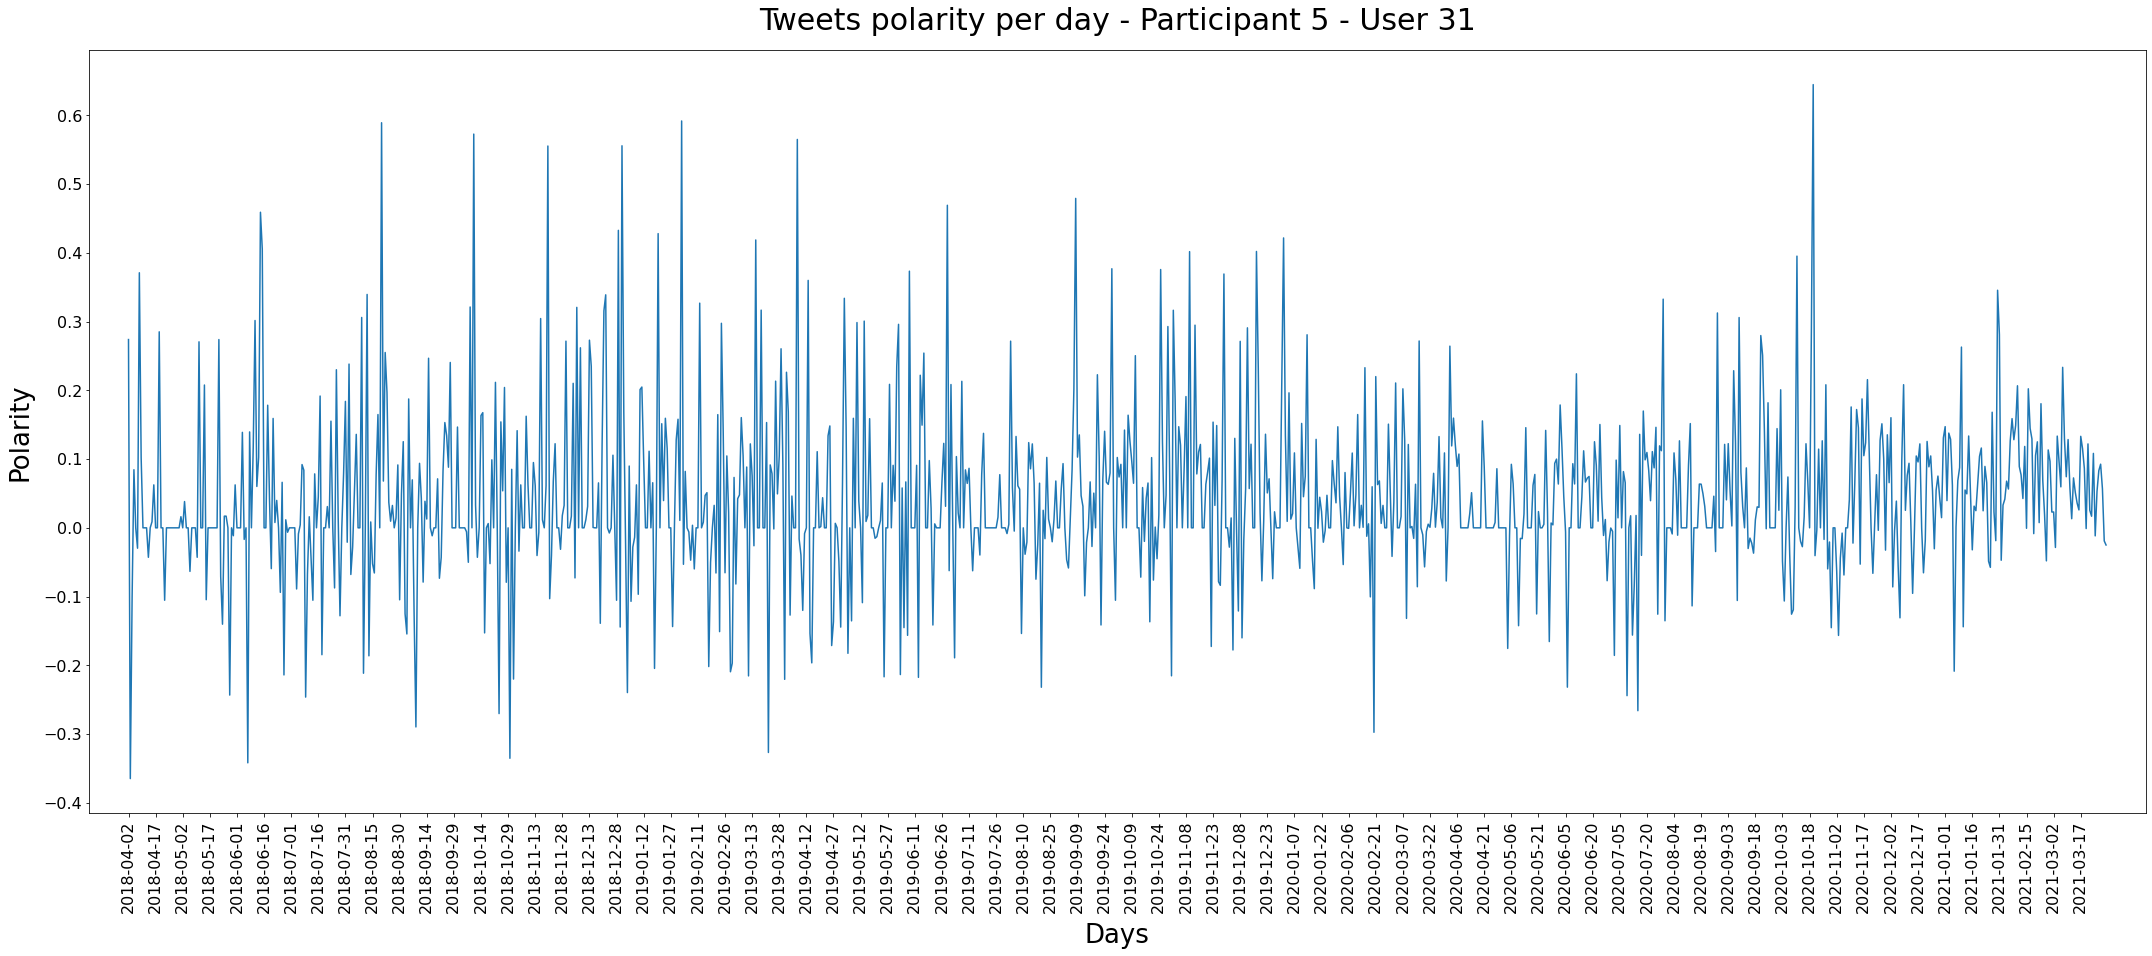

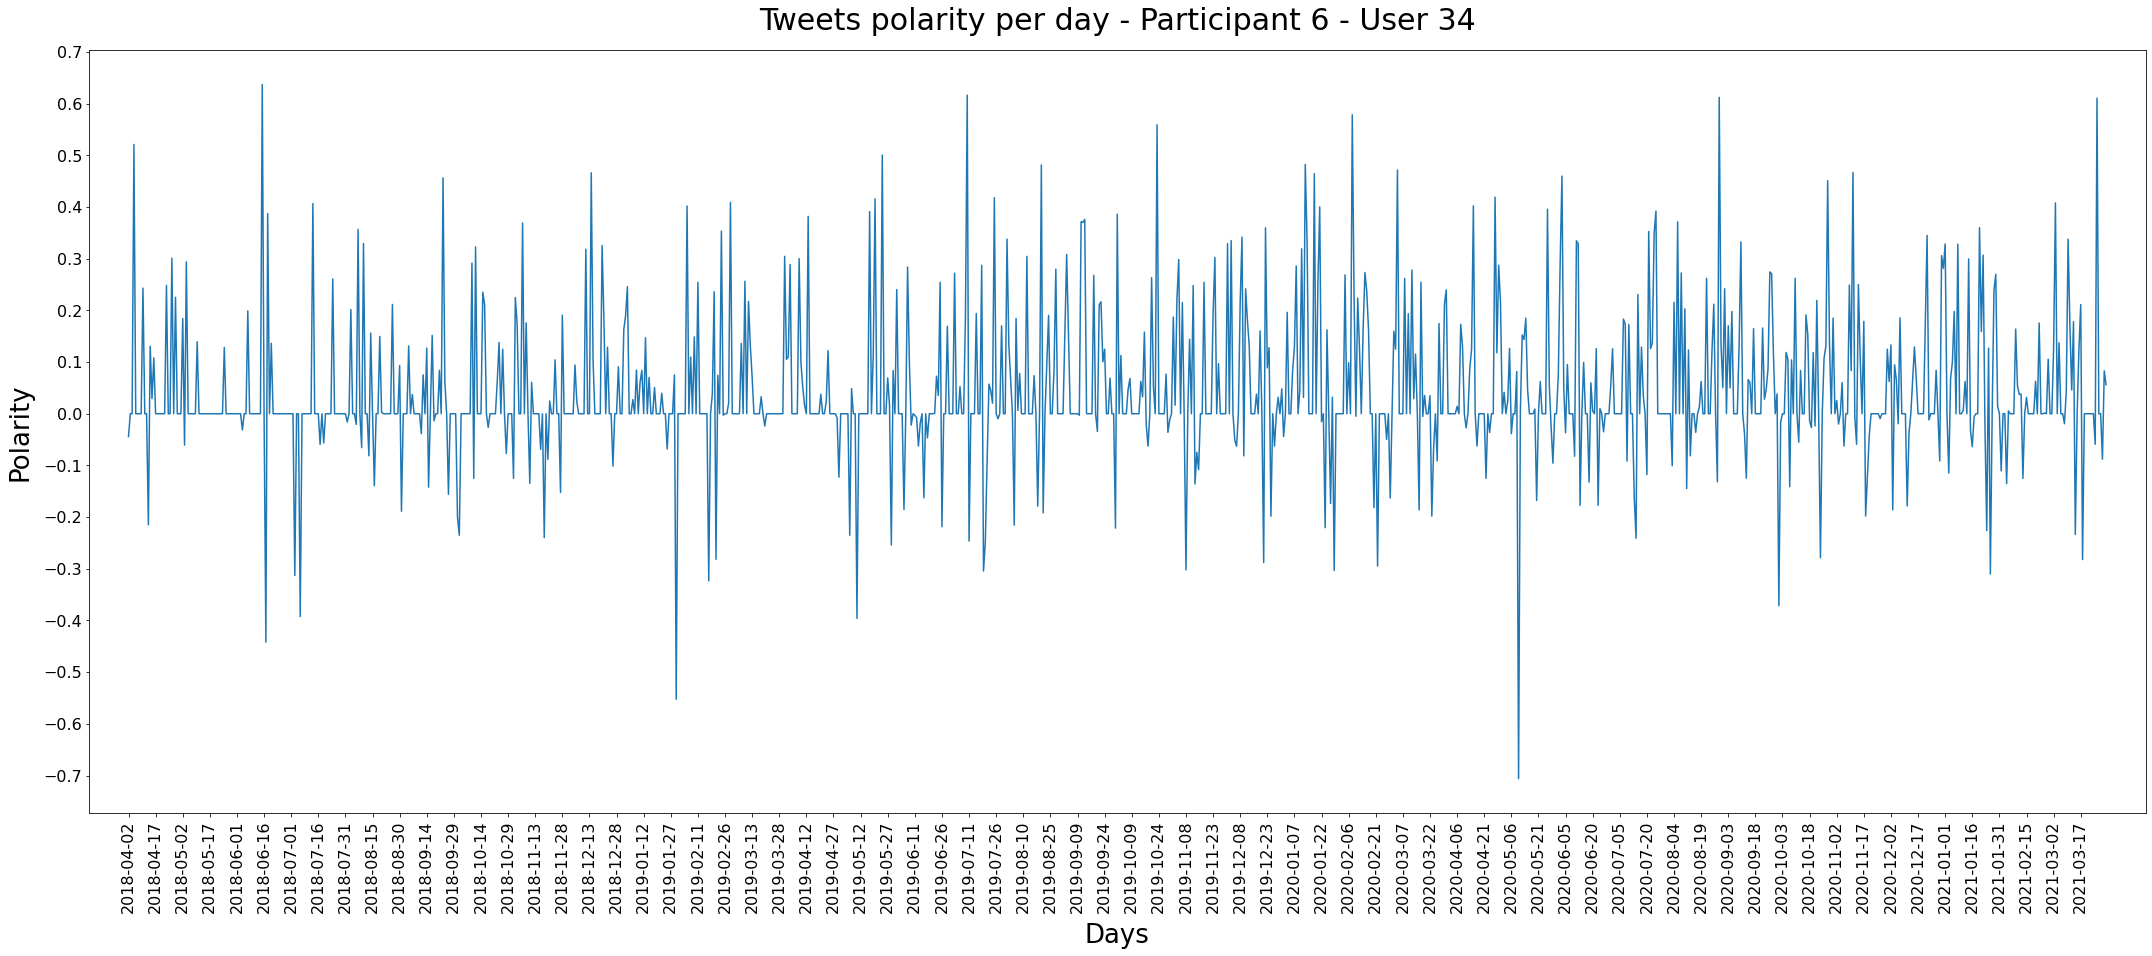

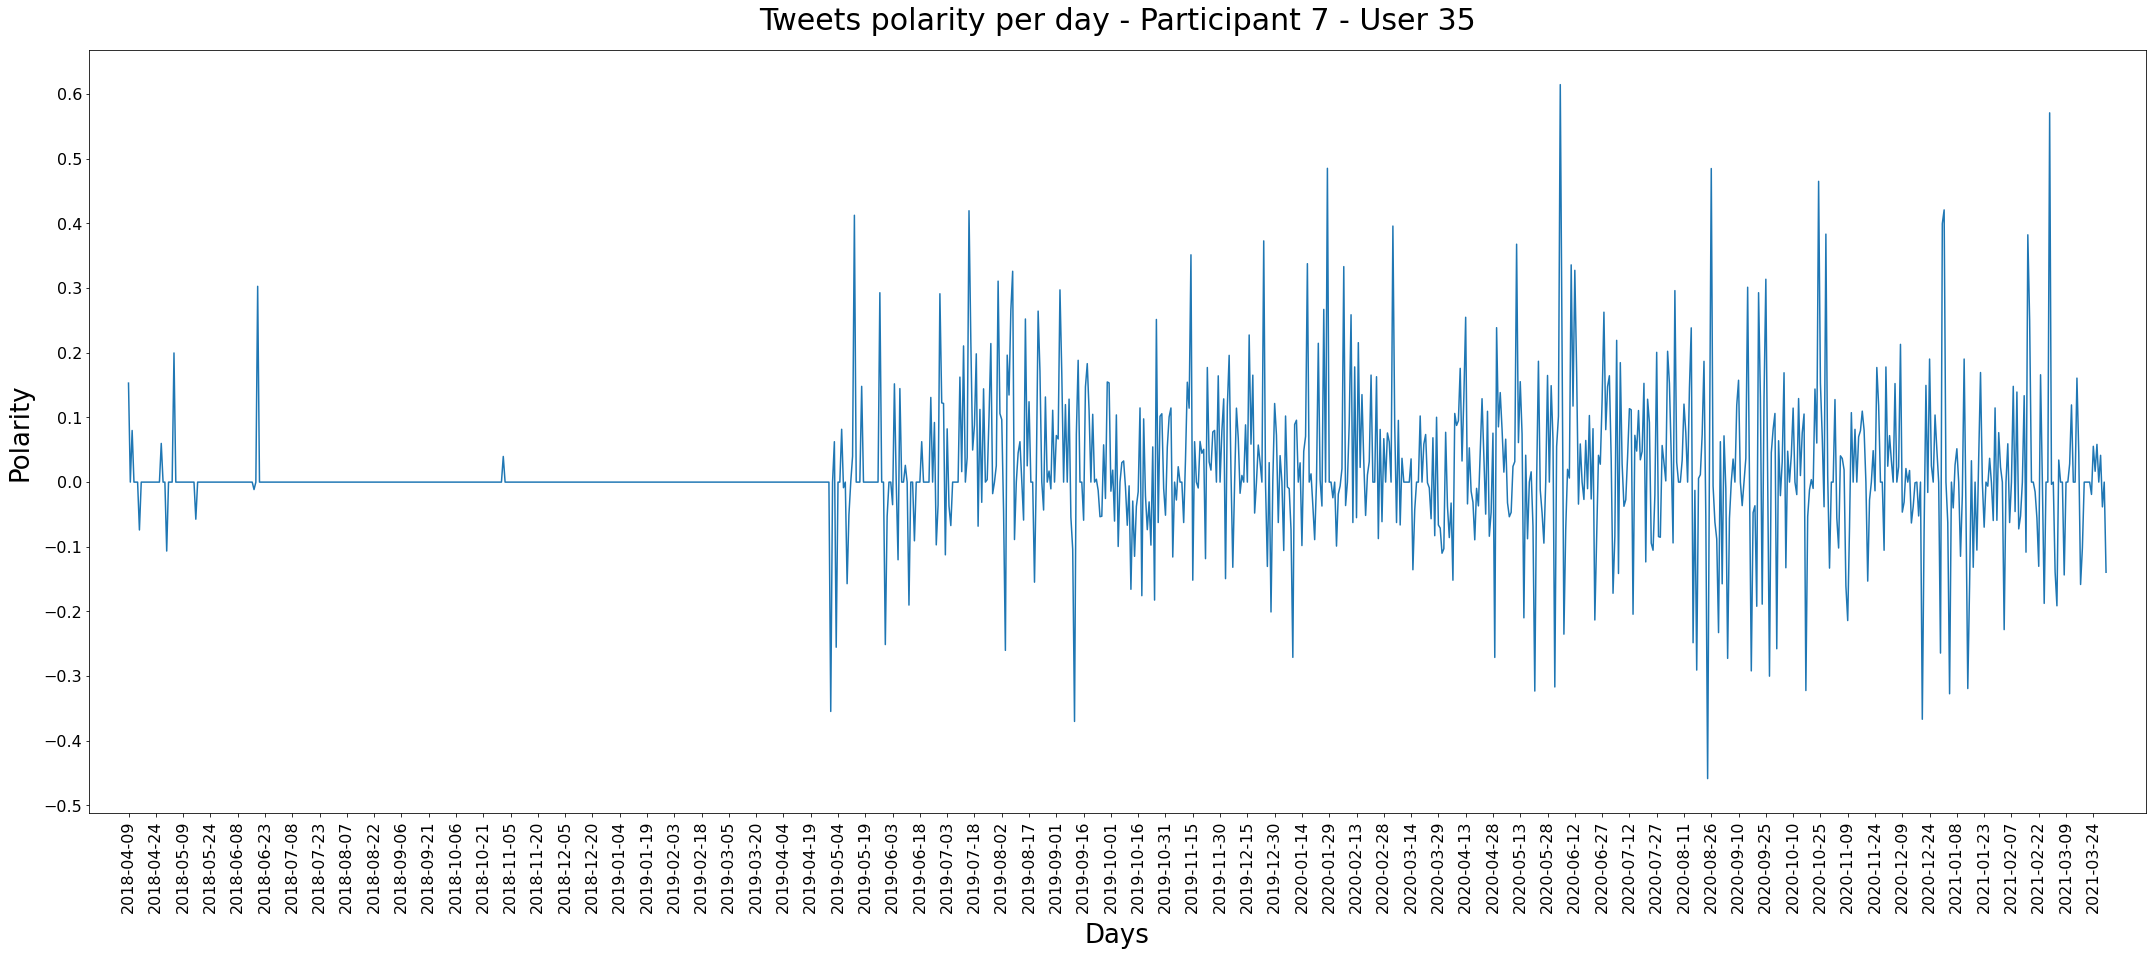

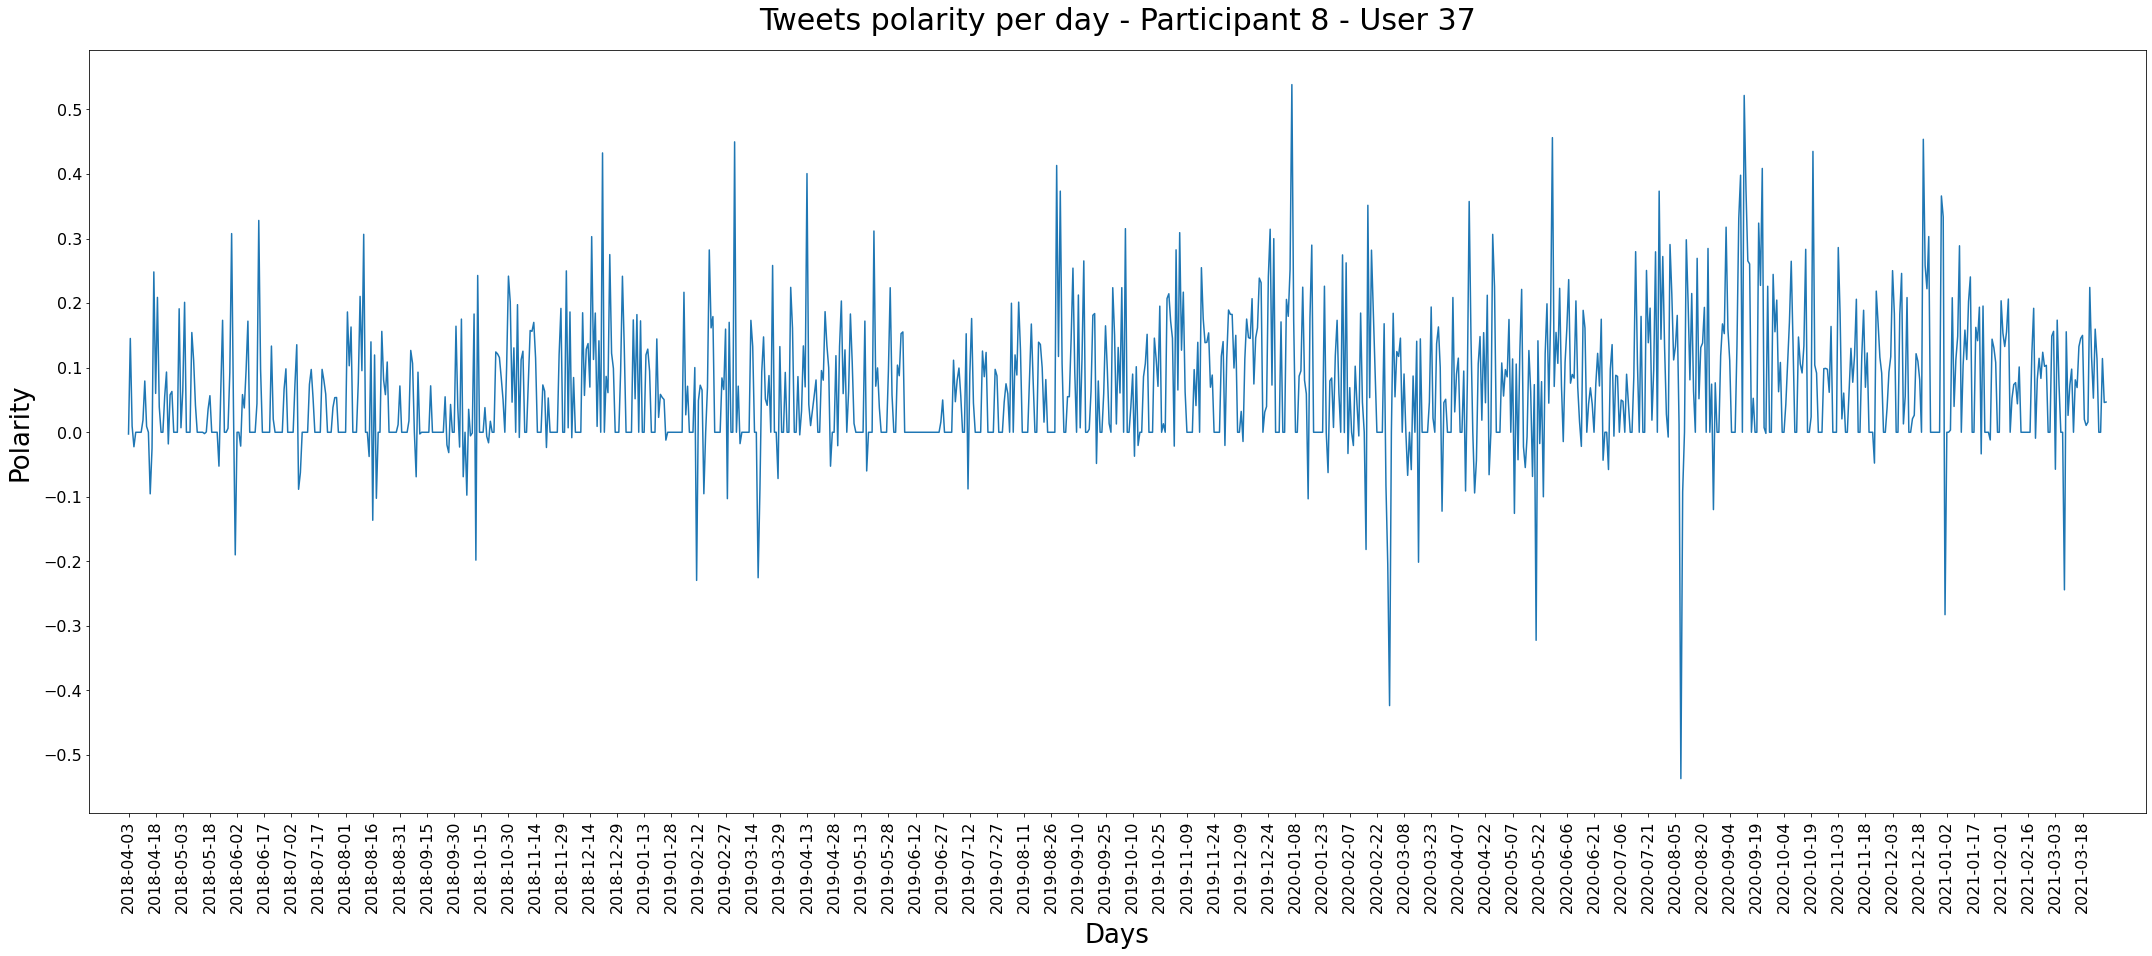

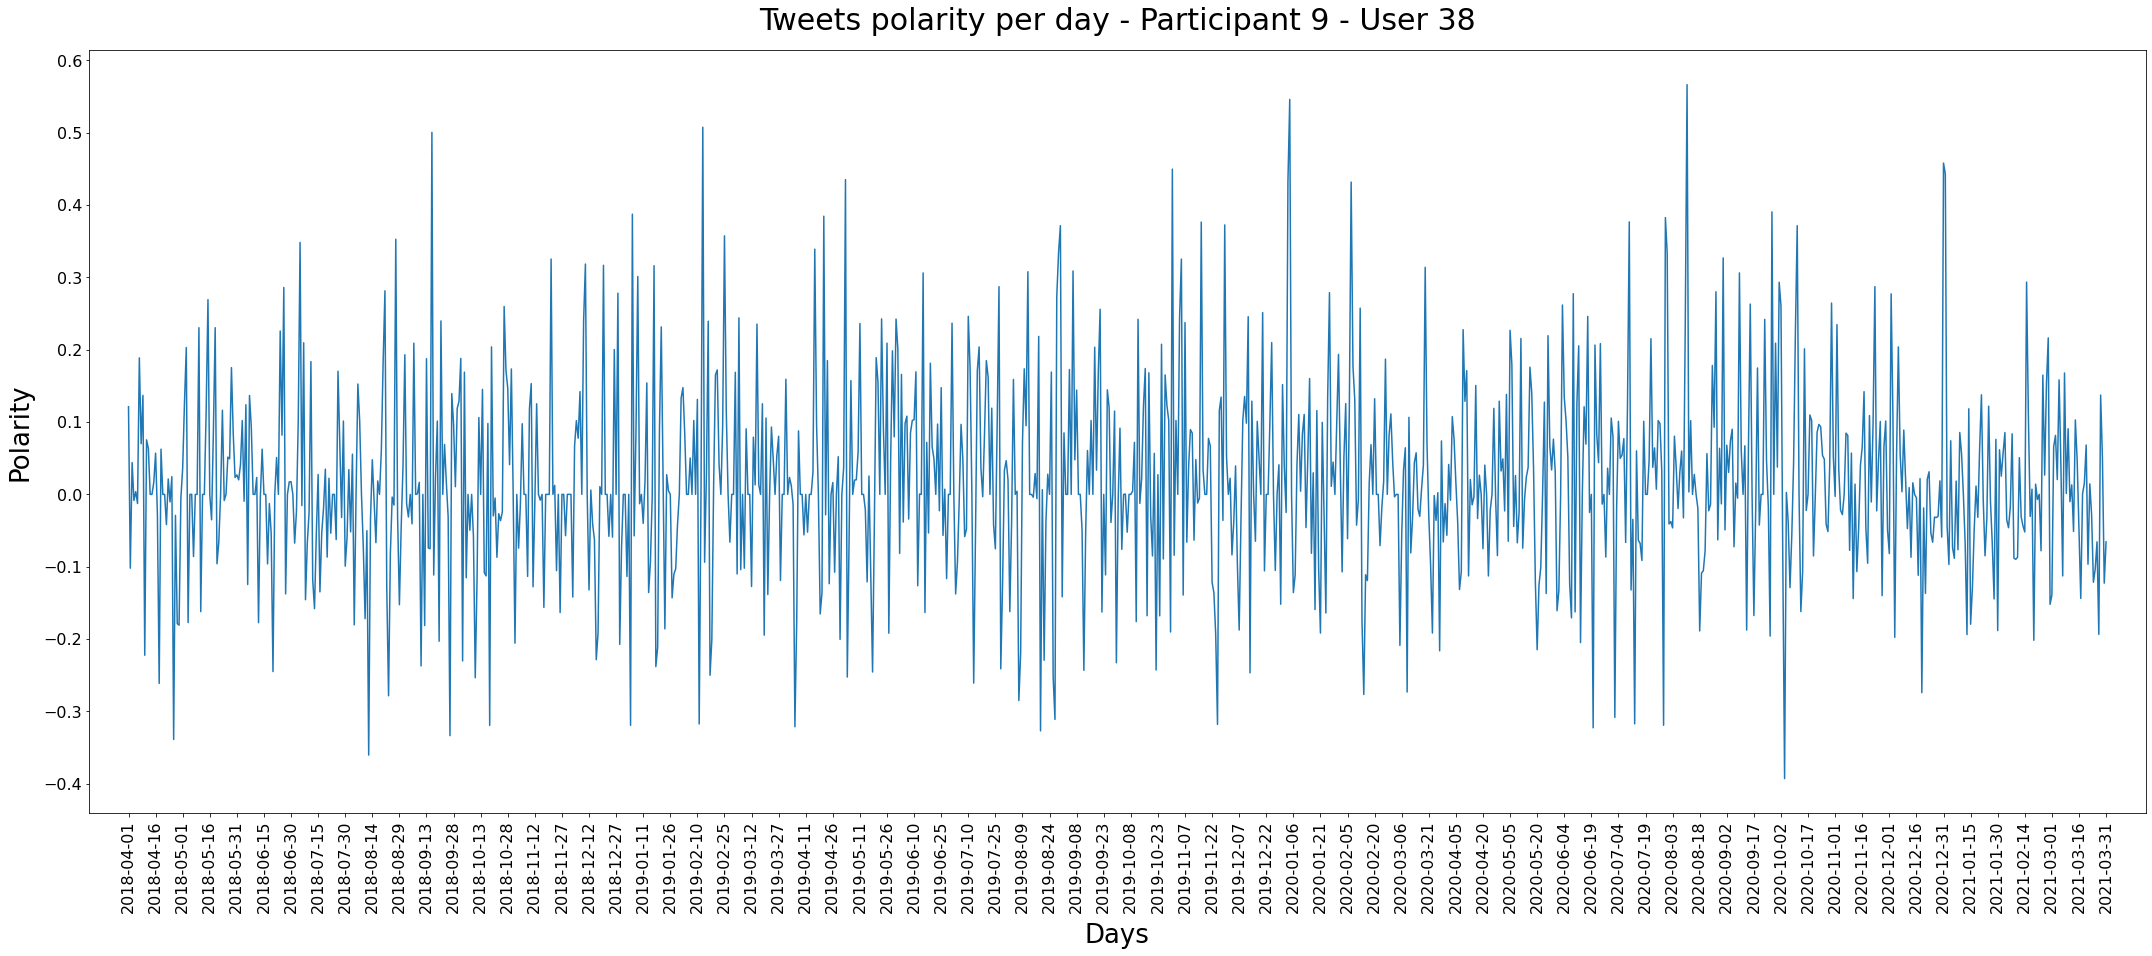

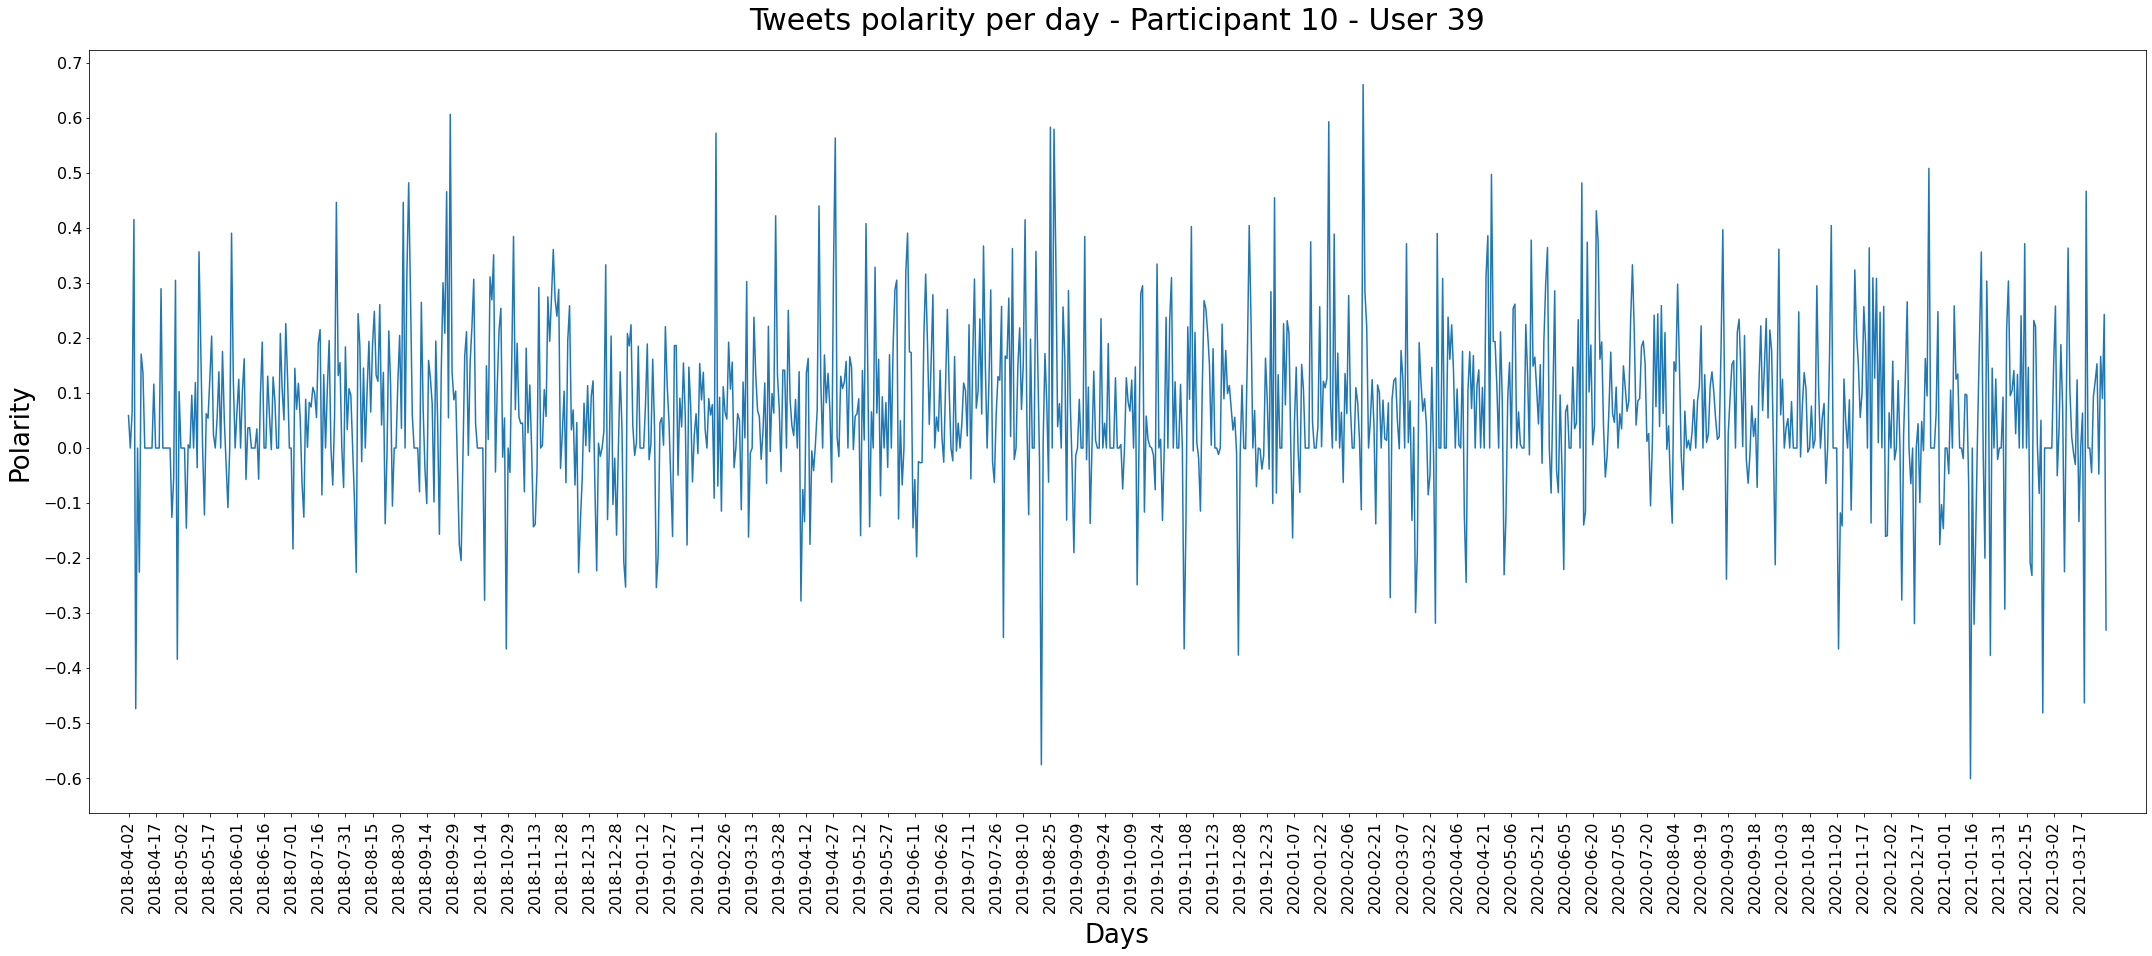

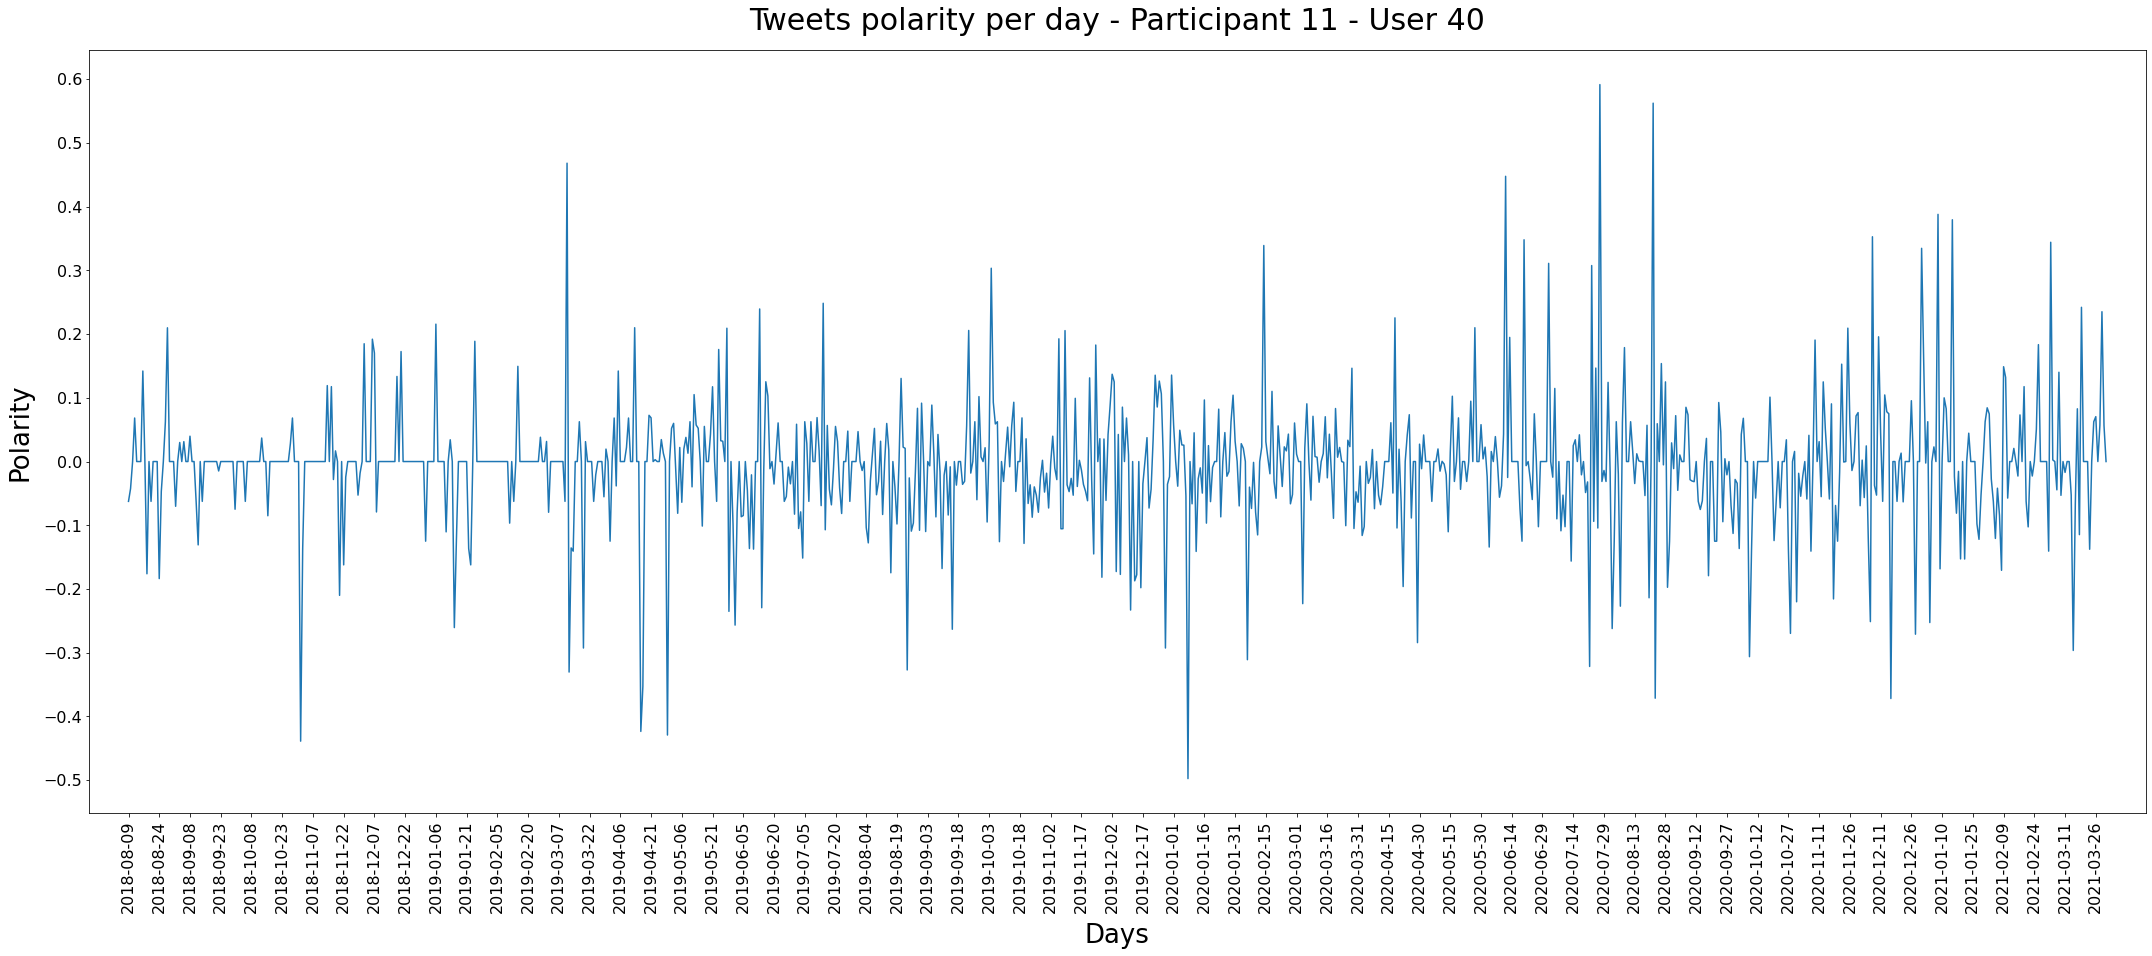

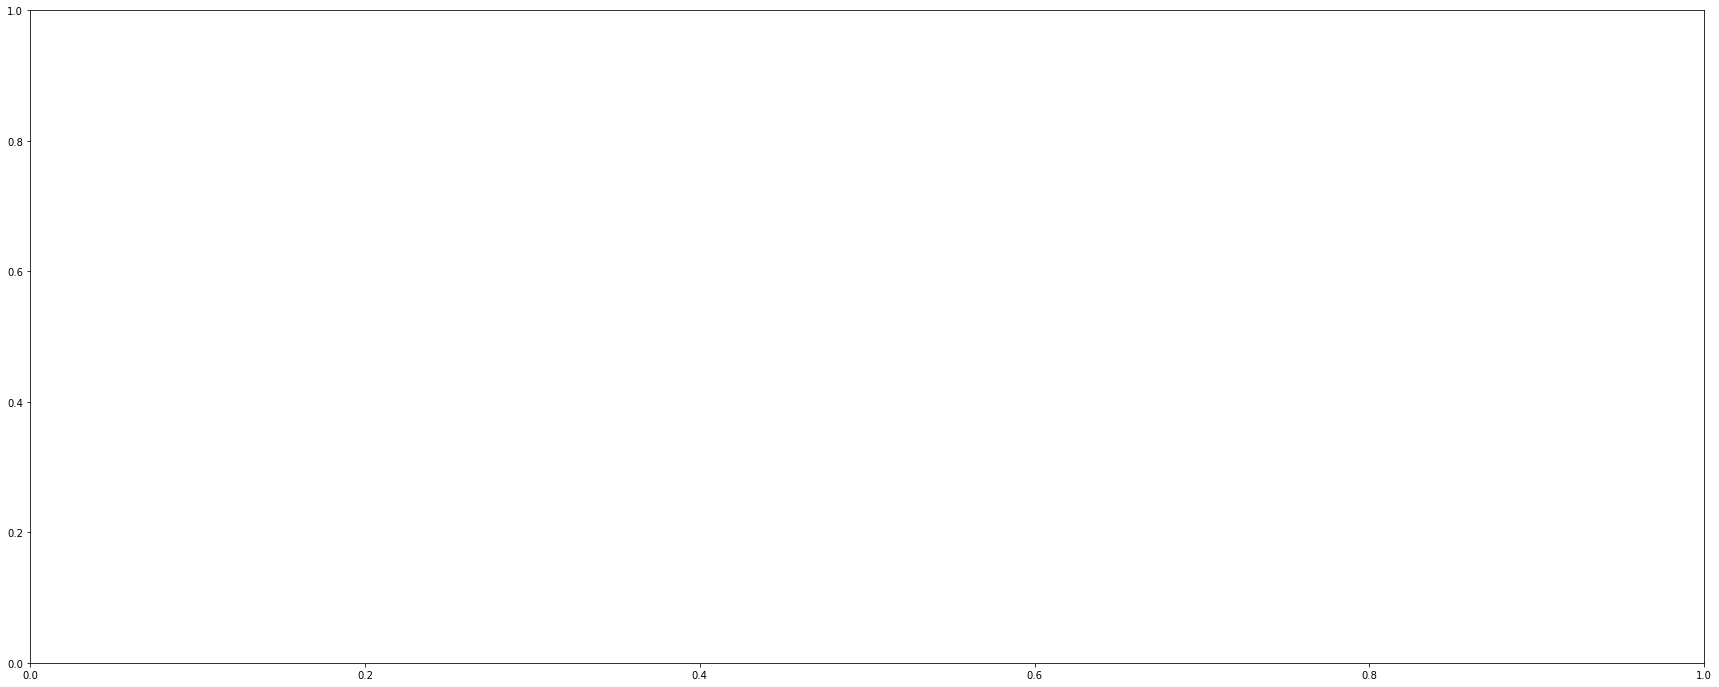

In [78]:
count = 1
for c in data:
    id_user = c
    if data[id_user]['bigfive']:
        tweets = create_tweets_pd(data, id_user)
        columns_to_delete = ['id', 'id_str_twitter', "text", 'favorite_count', 'retweet_count', 'lang', "id_user",
                             "vader_sentiment_analysis_score", "vader_sentiment_analysis_polarity",
                            "oplexicon_sentiment_analysis_score", "oplexicon_sentiment_analysis_polarity",
                            "sentistrength_sentiment_analysis_score", "sentistrength_sentiment_analysis_polarity",
                            "sentilexpt_sentiment_analysis_score", "sentilexpt_sentiment_analysis_polarity",
                            'text_updated', 'is_retweet', 'retweet_updated']

        for c in columns_to_delete:
            del tweets[c]

        print(id_user)
        create_line_plot(tweets, id_user, count)
        count += 1

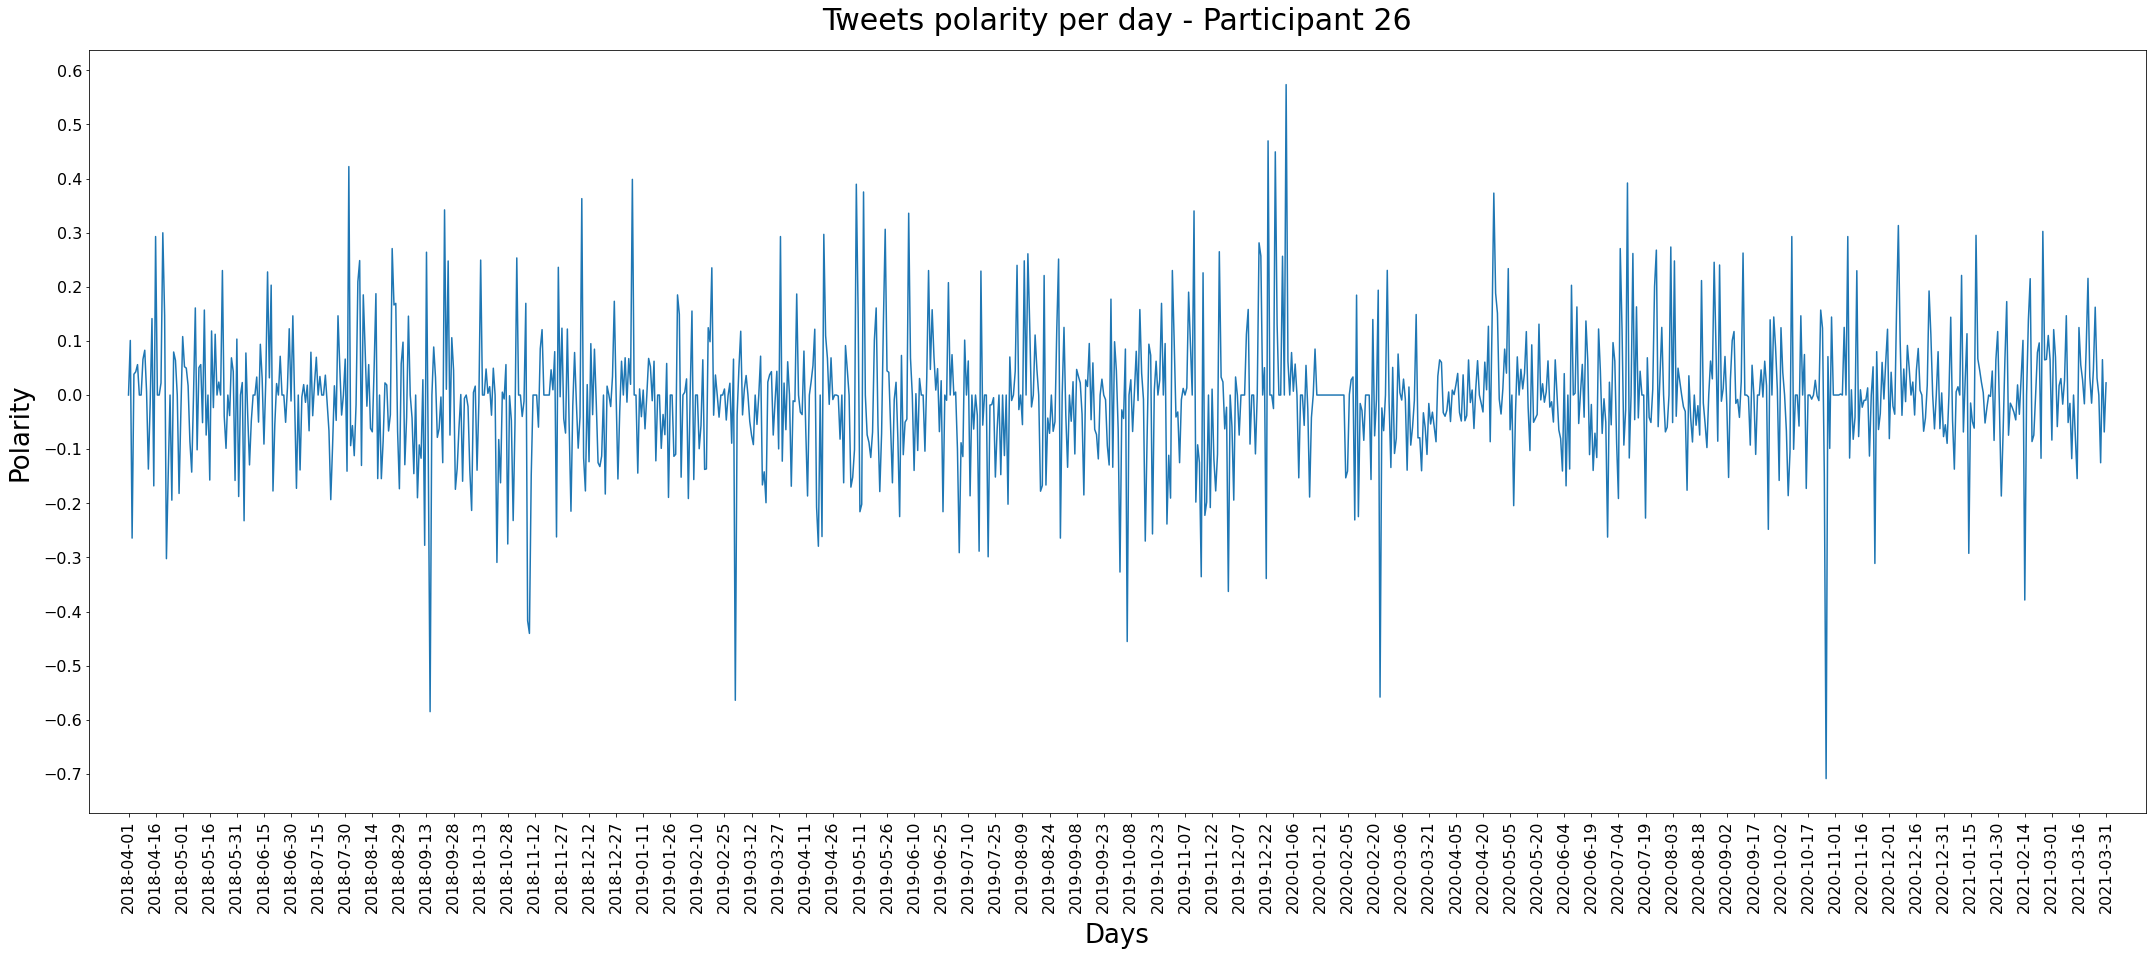

In [62]:
fig, ax = plt.subplots(figsize=(30, 12))

tweets["created_at"] = pd.to_datetime(tweets["created_at"])
tweets['date_minus_time'] = tweets["created_at"].apply(lambda tweets : datetime.datetime(year=tweets.year, month=tweets.month, day=tweets.day))
# tweets.set_index(tweets["date_minus_time"], inplace=True)


# tweets

new_df = pd.DataFrame(tweets['final_score'].resample('D').mean())
new_df = new_df.fillna(0)

x = new_df.index
y = new_df['final_score']

ran = range(0, len(x), 15)

x_ticks = new_df.index[ran]

colors = {'pos':'green', 'neu':'orange', 'neg':'red'}

plt.yticks(np.arange(-1.0, 1.1, 0.1), fontsize=16)
plt.xticks(x_ticks, rotation='vertical', fontsize=16)

date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
plt.xlabel('Day', fontsize=16)
plt.ylabel('Polarity Score', fontsize=16)

plt.title("Tweets polarity per day - Participant {}".format(26), fontsize=30, pad = 20)
plt.ylabel("Polarity", fontsize=26, labelpad = 10)
plt.xlabel("Days", fontsize=26, labelpad = 10)

# plt.axhline(y.mean(), color='k', linestyle='dashed', linewidth=1)
# min_ylim, max_ylim = plt.ylim()
# plt.text(y.mean()*0.05, max_ylim*0.12, 'Mean: {:.2f}'.format(y.mean()))

plt.margins(x=0.02)
plt.tight_layout()
plt.plot(x,y)